<h1 align="center"><font color="yellow">Linguagem Natural para SQL usando ChatGPT</font></h1>

<font color="yellow">Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [NLP to SQL using ChatGPT](https://medium.com/@soumyansh/natural-language-to-sql-using-chatgpt-cb330d055180)

Neste Notebook aprenderemos a `traduzir Linguagem Natural para SQL`.

<font color="orange">O objetivo do `NLP` para `SQL` é facilitar a interação dos usuários com os `bancos de dados`, permitindo-lhes usar consultas em linguagem natural em vez de escrever `códigos SQL complexos`.

Isso ajuda muitos usuários não técnicos a obter insights significativos de seu conjunto de dados usando uma linguagem simples em inglês ou "qualquer outro idioma".</font>

In [31]:
import os
import openai 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY') # Adicionei isto porque estou usando davinci

# <font color="red">Declaração do problema: Traduzindo texto simples em `português` em `queries SQL`</font>

<font color="orange">Resposta à pergunta de linguagem natural, como `“Quais países tiveram as maiores vendas?”` e converta isso em uma `query SQL`.</font>


Leremos o conjunto de dados [sales_data_sample.csv](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data) usando pandas e, em seguida, enviaremos os mesmos dados para um `banco de dados temporário usando a biblioteca SQL Alchemy`.

## `Passo 1:` Aquisição de Dados

In [2]:
# Dataset:
import pandas as pd

df = pd.read_csv("sales_data_sample.csv")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.shape

(2823, 25)

## `Passo 2:` Configuração do banco de dados SQL e criação da conexão

<font color="orange">Configurando um DB temporário na memória (`RAM`) e depois exportando o `CSV` $→$ `Pandas` $→$ `SQL DB`</font>

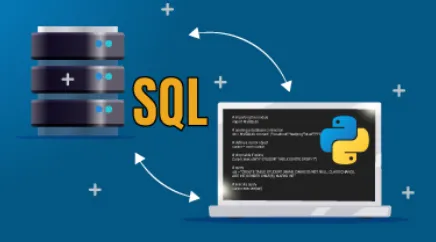

### <font color="pink">Configurando o banco de dados (`SQL Database Setup`)</font>

In [9]:
from sqlalchemy import create_engine
from sqlalchemy import text


#temp_db = create_engine('sqlite:///:memory:', echo=True)
temp_db = create_engine('sqlite:///Eddy_Sales.db', echo=True)

<font color="orange">`echo=True:` Este é um argumento opcional que, quando definido como True, faz com que o mecanismo de banco de dados imprima informações detalhadas sobre as operações de banco de dados executadas, como consultas SQL, no console. Isso pode ser útil para fins de depuração.</font>

In [10]:
temp_db

Engine(sqlite:///Eddy_Sales.db)

<font color="orange">Aqui colocamos todo o nosso `DataFrame` em uma tabela chamada `Eddy_Sales`:</font>

In [11]:
data = df.to_sql(name='Eddy_Sales', con=temp_db)

2023-09-06 22:18:21,250 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-06 22:18:21,254 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Eddy_Sales")
2023-09-06 22:18:21,255 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-06 22:18:21,256 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Eddy_Sales")
2023-09-06 22:18:21,256 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-06 22:18:21,258 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Eddy_Sales" (
	"index" BIGINT, 
	"ORDERNUMBER" BIGINT, 
	"QUANTITYORDERED" BIGINT, 
	"PRICEEACH" FLOAT, 
	"ORDERLINENUMBER" BIGINT, 
	"SALES" FLOAT, 
	"ORDERDATE" TEXT, 
	"STATUS" TEXT, 
	"QTR_ID" BIGINT, 
	"MONTH_ID" BIGINT, 
	"YEAR_ID" BIGINT, 
	"PRODUCTLINE" TEXT, 
	"MSRP" BIGINT, 
	"PRODUCTCODE" TEXT, 
	"CUSTOMERNAME" TEXT, 
	"PHONE" TEXT, 
	"ADDRESSLINE1" TEXT, 
	"ADDRESSLINE2" TEXT, 
	"CITY" TEXT, 
	"STATE" TEXT, 
	"POSTALCODE" TEXT, 
	"COUNTRY" TEXT, 
	"TERRITORY" TEXT, 
	"CONTACTLASTNAME" TEXT, 
	"CONTACTFIRSTNAME" TEXT, 
	"DEALSI

In [12]:
data

2823

### <font color="pink">Criando a conexão com SQL e consultando o banco de dados</font>

<font color="orange">Usando `SQL Alchemy` para estabelecer uma conexão com este banco de dados temporário e consultá-lo para obter os resultados.</font>

In [13]:
with temp_db.connect() as conn:
    result = conn.execute(text("Select ORDERNUMBER, SALES from Eddy_Sales ORDER BY SALES DESC LIMIT 2")) # Está é uma query na linguagem SQL 😊


2023-09-06 22:18:30,687 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-06 22:18:30,688 INFO sqlalchemy.engine.Engine Select ORDERNUMBER, SALES from Eddy_Sales ORDER BY SALES DESC LIMIT 2
2023-09-06 22:18:30,689 INFO sqlalchemy.engine.Engine [generated in 0.00145s] ()
2023-09-06 22:18:30,689 INFO sqlalchemy.engine.Engine ROLLBACK


In [14]:
result.all() # Você pode fazer está query lá, também, na Interface gráfica 

[(10407, 14082.8), (10322, 12536.5)]

## `Passo 3:` Configurar uma conta da API da `OpenAI` e informar a GPT sobre nossos dados

<font color="orange">Informe ao ChatGPT sobre a estrutura da tabela `SQL`.</font>

In [15]:
def create_table_definition_prompt(df):
    """
    Esta função retorna um PROMPT que informa ao ChatGPT que queremos trabalhar com tabelas SQL
    """

    prompt = '''### Tabela SQL sqlite, com suas propriedades:
#
# Eddy_Sales({})
#
'''.format(",".join(str(x) for x in df.columns))
    
    return prompt

In [16]:
print(create_table_definition_prompt(df))


### Tabela SQL sqlite, com suas propriedades:
#
# Eddy_Sales(ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE)
#



<font color="orange">Podemos ver acima como criamos a estrutura da `tabela SQL` usando todas as colunas do quadro de dados do pandas.</font>

## `Passo 3:` Receber solicitações de linguagem natural do usuário final e combinar prompts

<font color="orange">Estaremos criando uma função de entrada para capturar a solicitação do usuário.</font>

### <font color="pink">Obtenha solicitação de linguagem natural</font>

<font color="orange">Criando uma função que captura a solicitação de informações em linguagem natural.</font>

In [17]:
def prompt_input():
    nlp_text = input("Insira as informações que deseja obter:")
    return nlp_text


In [ ]:
nlp_text = prompt_input()


In [20]:
nlp_text

'Soma de SALES por POSTALCODE'

<font color="orange">No prompt acima, o usuário solicitou a `“Soma das vendas por código postal”` (em inglês: "Sum of sales per Postal Code") usando texto simples em inglês ou português.

Agora estaremos criando uma função para combinar o `prompt do usuário` com a estrutura da tabela com a string adicional `“Uma query para responder”` seguida da palavra-chave `“Select”` para que o ChatGPT entenda a pergunta corretamente.</font>

In [21]:
def combine_prompts(df, query_prompt):
    definition = create_table_definition_prompt(df)
    query_init_string = f"### A query para responder: {query_prompt}\nSELECT"
    return definition+query_init_string


In [22]:
combine_prompts(df, nlp_text)

'### Tabela SQL sqlite, com suas propriedades:\n#\n# Eddy_Sales(ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE)\n#\n### A query para responder: Soma de SALES por POSTALCODE\nSELECT'

<font color="orange">O ChatGPT irá completar o texto acima, assim começamos a notificá-lo para iniciar uma consulta SQL escrevendo `"\nSELECT"`

NO seguinte passo vamos obter a resposta:</font>

## `Passo 3:` Chamando o modelo `davinci` e parsing a resposta

In [32]:
response = openai.Completion.create(model="text-davinci-003",
                                    prompt=combine_prompts(df, nlp_text),
                                    temperature=0,
                                    max_tokens=150,
                                    top_p=1.0,
                                    frequency_penalty=0.0,
                                    presence_penalty=0.0,
                                    stop=["#", ";"]
                                   )


In [33]:
response

<OpenAIObject text_completion id=cmpl-7vzHL0oxyBAlX0N17w7P6E4CYiqnr at 0x7fdfee3caf20> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": " POSTALCODE, SUM(SALES)\nFROM Eddy_Sales\nGROUP BY POSTALCODE"
    }
  ],
  "created": 1694054607,
  "id": "cmpl-7vzHL0oxyBAlX0N17w7P6E4CYiqnr",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 25,
    "prompt_tokens": 166,
    "total_tokens": 191
  },
  "warning": "This model version is deprecated. Migrate before January 4, 2024 to avoid disruption of service. Learn more https://platform.openai.com/docs/deprecations"
}

<font color="orange">Agora construindo uma função para analisar a seção de resposta e passar a mesma para nosso banco de dados.</font>


Construindo uma função para analisar a seção da resposta que queremos:

In [34]:
def handle_response(response):
    query = response["choices"][0]["text"]
    if query.startswith(" "):
        query = "Select"+ query
    return query


In [35]:
handle_response(response)

'Select POSTALCODE, SUM(SALES)\nFROM Eddy_Sales\nGROUP BY POSTALCODE'

<font color="orange">Agora é só passar isso para nosso banco de dados:</font>

In [36]:
with temp_db.connect() as conn:
    result = conn.execute(text(handle_response(response)))
    

2023-09-06 23:48:02,472 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-06 23:48:02,473 INFO sqlalchemy.engine.Engine Select POSTALCODE, SUM(SALES)
FROM Eddy_Sales
GROUP BY POSTALCODE
2023-09-06 23:48:02,473 INFO sqlalchemy.engine.Engine [generated in 0.00133s] ()
2023-09-06 23:48:02,478 INFO sqlalchemy.engine.Engine ROLLBACK


In [37]:
result.all()

[(None, 272407.14),
 ('10022', 560787.7699999998),
 ('10100', 94117.26000000002),
 ('106-0032', 120562.73999999996),
 ('1203', 117713.55999999998),
 ('1227 MM', 94015.73),
 ('13008', 74936.14),
 ('1734', 145041.6),
 ('2', 57756.43),
 ('2060', 153996.13000000003),
 ('2067', 151570.98000000004),
 ('21240', 111250.37999999996),
 ('24067', 85555.98999999998),
 ('24100', 137955.72000000003),
 ('28023', 170257.33000000005),
 ('28034', 912294.1100000002),
 ('3004', 200995.40999999997),
 ('31000', 70488.44),
 ('3150', 64591.46000000001),
 ('4101', 59469.11999999999),
 ('4110', 116599.19),
 ('41101', 54723.62),
 ('42100', 142601.33000000002),
 ('44000', 204304.86),
 ('5020', 149798.63),
 ('50553', 207874.86),
 ('50739', 100306.58),
 ('51003', 154069.65999999997),
 ('51100', 135042.94),
 ('51247', 139243.99999999994),
 ('530-0003', 67605.07),
 ('58339', 165255.20000000004),
 ('59000', 69052.41),
 ('60528', 85171.58999999998),
 ('62005', 131685.30000000002),
 ('67000', 80438.48),
 ('69004', 14287

<font color="red">OBS:</font>

Tem alguns autores falando que esta abordagem dá erro quando você tem entre 10 ou 12 tabelas ... gera erro de limite de Token.